## 多层感知机

### 在网络中加入隐藏层
我们可以通过在网络中加入一个或多个隐藏层来克服线性模型的限制，
使其能处理更普遍的函数关系类型。
要做到这一点，最简单的方法是将许多全连接层堆叠在一起。
每一层都输出到上面的层，直到生成最后的输出。
我们可以把前$L-1$层看作表示，把最后一层看作线性预测器。
这种架构通常称为多层感知机（multilayer perceptron），通常缩写为MLP。

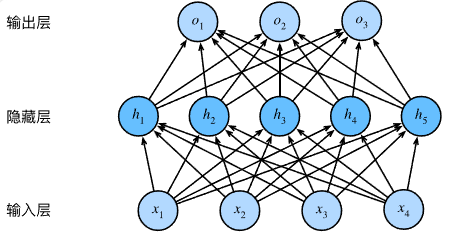

这个多层感知机有4个输入，3个输出，其隐藏层包含5个隐藏单元。
输入层不涉及任何计算，因此使用此网络产生输出只需要实现隐藏层和输出层的计算。
因此，这个多层感知机中的层数为2。
注意，这两个层都是全连接的。
每个输入都会影响隐藏层中的每个神经元，
而隐藏层中的每个神经元又会影响输出层中的每个神经元。

### 从线性到非线性

对于具有$h$个隐藏单元的单隐藏层多层感知机，
用$\mathbf{H} \in \mathbb{R}^{n \times h}$表示隐藏层的输出，
称为*隐藏表示*（hidden representations）。
在数学或代码中，$\mathbf{H}$也被称为*隐藏层变量*（hidden-layer variable）
或*隐藏变量*（hidden variable）。
因为隐藏层和输出层都是全连接的，
所以我们有隐藏层权重$\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$
和隐藏层偏置$\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$
以及输出层权重$\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$
和输出层偏置$\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$。
形式上，我们按如下方式计算单隐藏层多层感知机的输出
$\mathbf{O} \in \mathbb{R}^{n \times q}$：

$$
\begin{aligned}
    \mathbf{H} & = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}, \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}
$$


此时，上面的隐藏单元由输入的仿射函数给出，而输出（softmax操作前）只是隐藏单元的仿射函数。仿射函数的仿射函数本身就是仿射函数，但是之前的线性模型已经能够表示任意仿射函数。

我们可以证明这一等价性，即对于任意权重值，
我们只需合并隐藏层，便可产生具有参数
$\mathbf{W} = \mathbf{W}^{(1)}\mathbf{W}^{(2)}$
和$\mathbf{b} = \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}$
的等价单层模型：

$$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.
$$


为了发挥多层架构的潜力，需要在仿射变换之后对每个隐藏单元应用非线性的激活函数（activation function）$\sigma$。激活函数的输出称为活性值（activations）。一般来说，有了激活函数，就不可能再将我们的多层感知机退化为线性模型：

$$
\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}
$$

为了构建更通用的多层感知机，
我们可以继续堆叠这样的隐藏层，
例如$\mathbf{H}^{(1)} = \sigma_1(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})$和$\mathbf{H}^{(2)} = \sigma_2(\mathbf{H}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)})$，
一层叠一层，从而产生更有表达能力的模型。

## 激活函数

激活函数（activation function）通过计算加权并加上偏置来确定神经元是否应该被激活，它们将输入信号转换为输出的可微运算。

大多数激活函数都是非线性的。

In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l

### ReLU函数

修正线性单元（Rectified linear unit, ReLU）实现简单，同时在各种预测任务中表现良好。给定元素$x$，ReLU函数被定义为该元素与$0$的最大值：

$$\operatorname{ReLU}(x) = \max(x, 0).$$

即ReLU函数通过将相应的活性值设为0，仅保留正元素并丢弃所有负元素。

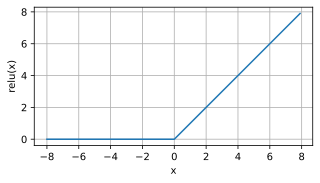

In [3]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad = True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize = (5, 2.5))

当输入为负时，ReLU函数的导数为0，而当输入为正时，ReLU函数的导数为1，当输入值精确等于0时，ReLU函数不可导，此时我们默认使用左侧的导数，即当输入为0时导数为0。

ReLU函数的导数：

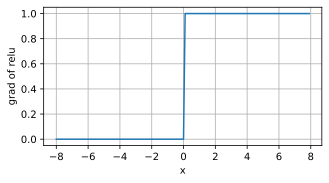

In [4]:
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize = (5, 2.5))

使用ReLU的原因是，它求导表现得特别好：要么让参数消失，要么让参数通过。这使得优化表现得更好，并且ReLU减轻了困扰以往神经网络的梯度消失问题。

ReLU函数有许多变体，包括参数化ReLU（Parameterized ReLU, pReLU）函数。该变体为ReLU添加了一个线性项，因此即使参数是负的，某些信息仍然可以通过：

$$\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x).$$

### sigmoid函数

对于一个定义域在$\mathbb{R}$中的输入，
sigmoid函数将输入变换为区间(0, 1)上的输出。
因此，sigmoid通常称为挤压函数（squashing function）：
它将范围（-inf, inf）中的任意输入压缩到区间（0, 1）中的某个值：

$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

sigmoid可以视为softmax的特例。当输入接近0时，sigmoid函数接近线性变换。

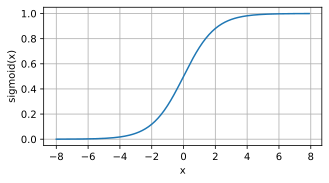

In [5]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize = (5, 2.5))

sigmoid函数的导数为下面的公式：

$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$

sigmoid函数的导数图像如下所示。
注意，当输入为0时，sigmoid函数的导数达到最大值0.25；
而输入在任一方向上越远离0点时，导数越接近0。

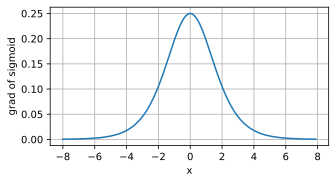

In [6]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize = (5, 2.5))

### tanh函数

与sigmoid函数类似，tanh（双曲正切）函数也能将其输入压缩转换到区间(-1, 1)上。tanh函数的公式如下：

$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

当输入在0附近时，tanh函数接近线性变换。
函数的形状类似于sigmoid函数，
不同的是tanh函数关于坐标系原点中心对称。


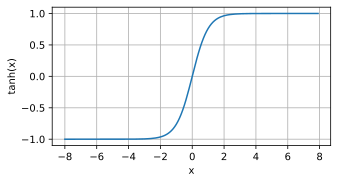

In [7]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize = (5, 2.5))

tanh函数的导数是：

$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

tanh函数的导数图像如下所示。
当输入接近0时，tanh函数的导数接近最大值1。
与我们在sigmoid函数图像中看到的类似，
输入在任一方向上越远离0点，导数越接近0。

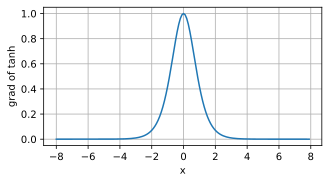

In [8]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize = (5, 2.5))

## 多层感知机的从零开始实现


In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 初始化模型参数

Fashion-MNIST中每个图像由$28×28=784$个灰度像素值组成，所有图像共分为10个类别。

忽略像素之间的空间结构，可以将每个图像视为具有784个输入特征和10个类的简单分类数据集。

首先，实现一个具有单隐藏层的多层感知机，它包含256个隐藏单元。我们可以将这两个变量都视为超参数。通常选择2的若干次幂作为层的宽度。因为内存在硬件中的分配和寻址方式，这样做往往可以在计算上更高效。

我们用几个张量来表示参数。注意，对于每一层都要记录一个权重矩阵和一个偏置向量，我们要为损失关于这些参数的梯度分配内存。

In [3]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

### 激活函数

实现ReLU激活函数

In [8]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

### 模型

使用reshape将每个二维图像转换为一个长度为num_inputs的向量。

In [9]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return(H@W2 + b2)

### 损失函数
使用高级API中的内置函数计算softmax和交叉熵损失。

In [12]:
loss = nn.CrossEntropyLoss()

### 训练

调用d2l包里的train_ch2函数，将迭代周期数设置为10，并将学习率设置为0.1。

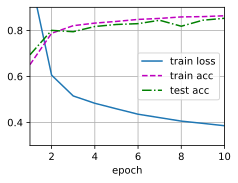

In [13]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr = lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

在测试数据上应用模型。

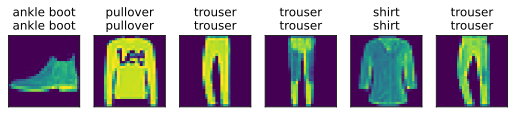

In [14]:
d2l.predict_ch3(net, test_iter)

## 多层感知机的简洁实现

In [15]:
import torch
from torch import nn
from d2l import torch as d2l

### 模型

与softmax回归的简洁实现相比，
唯一的区别是我们添加了2个全连接层（之前我们只添加了1个全连接层）。
第一层是隐藏层，它包含256个隐藏单元，并使用了ReLU激活函数。
第二层是输出层。

In [19]:
net = nn.Sequential(nn.Flatten(),
                   nn.Linear(784, 256),
                   nn.ReLU(),
                   nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std = 0.01)
        
net.apply(init_weights);

In [20]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr = lr)

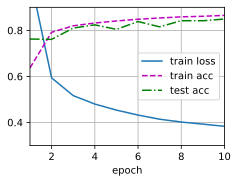

In [21]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)